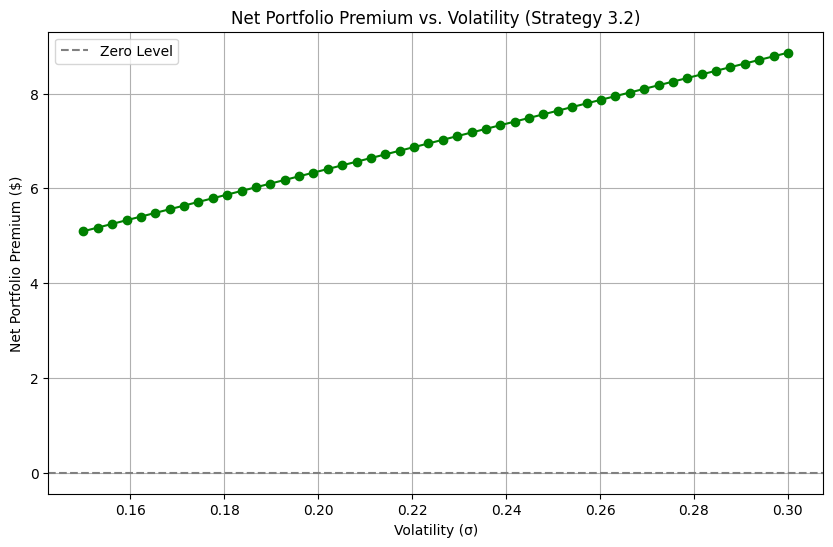

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm

def bs_call_price(S, K, r, sigma, T):
    """
    Compute the European call option price using the Black–Scholes formula.
    S: Current underlying price
    K: Strike price
    r: Risk-free interest rate
    sigma: Volatility (decimal)
    T: Time to expiration (years)
    """
    if T <= 0:
        return max(S - K, 0)
    d1 = (log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

def bs_put_price(S, K, r, sigma, T):
    """
    Compute the European put option price using the Black–Scholes formula.
    S: Current underlying price
    K: Strike price
    r: Risk-free interest rate
    sigma: Volatility (decimal)
    T: Time to expiration (years)
    """
    if T <= 0:
        return max(K - S, 0)
    d1 = (log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return K * exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

S0 = 100.0
r = 0.01

T_long = 0.5
strike_long = 100
qty_long_call = 5

T_short = 1/12
strike_straddle = 100
qty_straddle = 5

sigma_values = np.linspace(0.15, 0.30, 50)
portfolio_premiums = []

for sigma in sigma_values:
    premium_long_call = bs_call_price(S0, strike_long, r, sigma, T_long)

    premium_straddle_call = bs_call_price(S0, strike_straddle, r, sigma, T_short)
    premium_straddle_put = bs_put_price(S0, strike_straddle, r, sigma, T_short)
    premium_straddle = premium_straddle_call + premium_straddle_put

    net_premium = (qty_long_call * premium_long_call) - (qty_straddle * premium_straddle)
    portfolio_premiums.append(net_premium)

plt.figure(figsize=(10,6))
plt.plot(sigma_values, portfolio_premiums, marker='o', linestyle='-', color='green')
plt.title("Net Portfolio Premium vs. Volatility (Strategy 3.2)")
plt.xlabel("Volatility (σ)")
plt.ylabel("Net Portfolio Premium ($)")
plt.axhline(0, color='gray', linestyle='--', label="Zero Level")
plt.grid(True)
plt.legend()
plt.show()


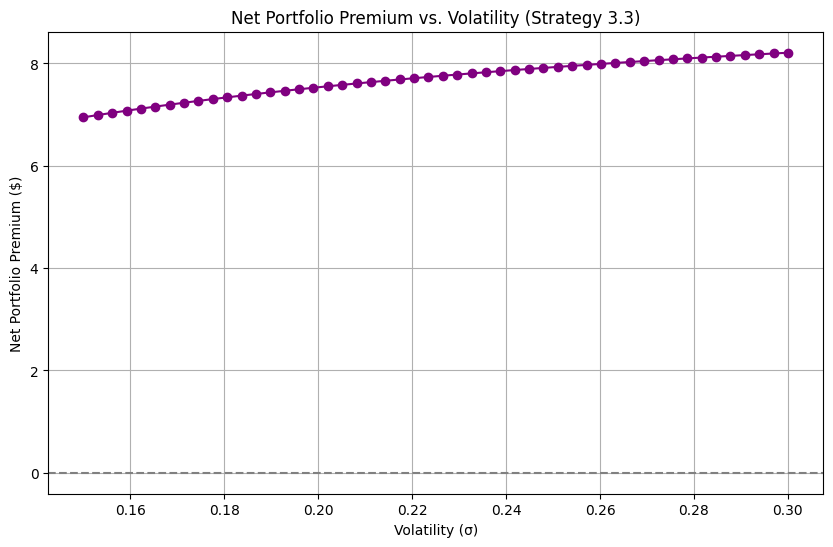

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm

def bs_call_price(S, K, r, sigma, T):
    if T <= 0:
        return max(S - K, 0)
    d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

def bs_put_price(S, K, r, sigma, T):
    if T <= 0:
        return max(K - S, 0)
    d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return K * exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

S0         = 100.0
r          = 0.01

T_long     = 0.5
strike_lc  = 100
qty_lc     = 5

T_sc       = 1/12
strike_sc  = 100
qty_sc     = -7

T_sp       = 0.25
strike_sp  = 95
qty_sp     = -3

sigma_vals  = np.linspace(0.15, 0.30, 50)
net_premium = []

for sigma in sigma_vals:
    prem_lc = bs_call_price(S0, strike_lc, r, sigma, T_long)
    prem_sc = bs_call_price(S0, strike_sc, r, sigma, T_sc)
    prem_sp = bs_put_price (S0, strike_sp, r, sigma, T_sp)

    net = qty_lc*prem_lc + qty_sc*prem_sc + qty_sp*prem_sp
    net_premium.append(net)

plt.figure(figsize=(10,6))
plt.plot(sigma_vals, net_premium, marker='o', color='purple')
plt.title("Net Portfolio Premium vs. Volatility (Strategy 3.3)")
plt.xlabel("Volatility (σ)")
plt.ylabel("Net Portfolio Premium ($)")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


this is after endsem exam 1

In [ ]:
!pip install yfinance --quiet

In [ ]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd

df_spot = yf.download("SPY", start="2010-01-01", end="2025-04-24")
df_spot.to_csv("spy_spot_history.csv")
print("Saved SPY spot history to spy_spot_history.csv")

ticker = yf.Ticker("SPY")

options_frames = []
for exp in ticker.options:
    chain = ticker.option_chain(exp)
    calls = chain.calls.copy()
    calls["optionType"] = "call"
    calls["expiration"] = exp
    puts = chain.puts.copy()
    puts["optionType"] = "put"
    puts["expiration"] = exp
    options_frames.extend([calls, puts])

df_options = pd.concat(options_frames, ignore_index=True)
df_options.to_csv("spy_option_chain.csv", index=False)
print("Saved SPY option chain to spy_option_chain.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Saved SPY spot history to spy_spot_history.csv
Saved SPY option chain to spy_option_chain.csv
